<a href="https://colab.research.google.com/github/mars241/NLP_Natural-Language-Processing/blob/main/AAM_WCS__NLP_6_Sentiment_analysis_CountVectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🦾Challenge

# Objectif
Il est temps de réunir toutes les notions précédentes!

1. Importe [ce dataset](https://github.com/murpi/wilddata/raw/master/quests/tweets.zip) de tweets dans un DataFrame.
2. Conserve uniquement les tweets positifs et négatifs (donc tu exclus les neutrals). Quel est le pourcentage de tweets positifs/négatifs ?
3. Crée une fonction que tu appelleras clean qui prend pour paramètre une phrase (donc un texte str) et qui retourne un texte (str) de tokens après application d'un stemmer ou d'un lemmatizer, séparés par des espaces.
Tu peux tester ta fonction avec cette phrase, elle doit retourner quelque chose ressemblant à ce résultat :

clean("You are better when I am well.")

>>> "you be well when I be well ."

4. Récupère la liste des stopwords anglais depuis NLTK, et copie-la dans une liste stopwordsenglish. Complète ta fonction clean pour qu'elle supprime la ponctuation et les stopwords.
5. Applique cette fonction clean à la colonne text de ton DataFrame. Stocke le résultat dans une nouvelle colonne clean du DataFrame. (Le traitement peut durer 2 ou 3 minutes)
Tu dois maintenant avoir un DataFrame qui ressemble à celui-ci (moins les pronoms, la ponctuation et peut-être d'autres mots en fonction des stopwords que tu as nettoyé) :
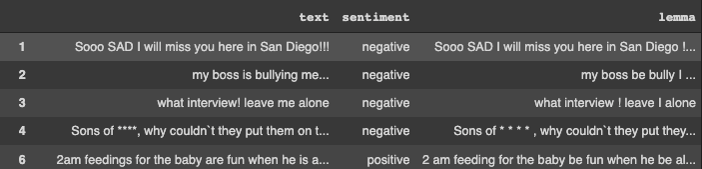

6. Copie la colonne clean dans une Serie X, et la colonne sentiment dans une Serie y. Applique un train-test split avec la taille du jeu d'entrainement à 0.75 avec le random_state = 32.
7. Applique un CountVectorizer et entraine des modèles de classification.
8. Applique un TfidfVectorizer et entraine des modèles de classification.
9. Compare les scores, quels paramètres permettent d'avoir les meilleurs scores ?
Bonus : maintenant c'est à toi d'améliorer ton modèle :

En cherchant des paramètres de modèles : par gridsearch et crossvalidation par exemple ;
En changeant la préparation du texte : par exemple certaines ponctuations peuvent aider le modèle, le point d'exclamation notamment.

# Critères de validation
Le notebook est consultable pour toute personne disposant du lien fourni par l'élève.

Le texte a subi le preprocessing demandé (stop words, stemmer/lemmatizer).
CountVectorizer et TfidfVectorizer sont utilisées pour le preprocessing, et leur performances sont comparées.

Les classifications de tweets sont effectués

Les performances des modèles sont mesurées.

Toutes les étapes sont réalisées.

1) Importe ce dataset de tweets dans un DataFrame.

In [ ]:
# Importation de la Bibliothèque pour la lecture/traitement de DF (train.csv)
import pandas as pd
import numpy as np

# Importe ce dataset de tweets dans un DataFrame.
df = pd.read_csv('https://github.com/murpi/wilddata/raw/master/quests/tweets.zip')
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


2) Conserve uniquement les tweets positifs et négatifs (donc tu exclus les neutrals). Quel est le pourcentage de tweets positifs/négatifs ?

In [ ]:
# Ne garder que les tweets positifs et négatifs
df = df[df['sentiment'].isin(['negative', 'positive'])]

3) Crée une fonction que tu appelleras clean qui prend pour paramètre une phrase (donc un texte str) et qui retourne un texte (str) de tokens après application d'un stemmer ou d'un lemmatizer, séparés par des espaces. Tu peux tester ta fonction avec cette phrase, elle doit retourner quelque chose ressemblant à ce résultat :

clean("You are better when I am well.")

>>>"you be well when I be well ."

RAPPEL NOTIONS:
* L'analyse des sentiments passe par techniques d'étude du text dans un contexte du **Machine Learning** : c'est du **NLP** ( **Natural Language Processing**)

* Une **tokenization** est réaliser dans **Natural Language Toolkit** (**NLTK**)

* En **text mining** on utilise du  **pré-processing**

* Les **deux techniques de pré-processing** très importantes : le stemming et le lemmatizing qui permèmetent de ***rassambler les mots de même racine, pour leurs donner plus de poids dans l'analyse*** :

* Implémenter en Python **le stemming (tronquer quelques caratères en fin de mot)**.

* Implémenter en Python **le lemmatizing (Analyse sémentique et gramaticale)**.

In [ ]:
# Importation de(s) modules pour la tokennization/ traitement des "Stopwords"
import nltk
from nltk.tokenize import word_tokenize

# Pour enlever les stops words 
from nltk.corpus import stopwords 

# téléchargement du package "stopword"
nltk.download('stopwords')  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#  Afficher le stop words dans le repectoire anglais
stop_words = stopwords.words('english')

stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Pour enlever les stops words des tokens en Anglais

# prendre pour paramètre une phrase (donc un texte str)
sentence =  'You are better when I am well.'

# Préliminaire avant la tokennization
# 1.1) Mettre minuscule
sentence = sentence.lower()
# 1.2) Enlever la ponctuation
import string # Importer le module correspondant
#string.punctuation #  Pour afficher la liste des ponctuations visés
for punctuation in string.punctuation:
    sentence = sentence.replace(punctuation, ' ') 

# tokennization
import nltk
from nltk.tokenize import word_tokenize

#Transforme ton texte en tokens de phrases (avec ".sent")
tokens_words = nltk.sent_tokenize(sentence) ##### /!\ A REVOIR: Peut-être un PB de Synthaxe ICI #####

# Pour enlever les stops words 
from nltk.corpus import stopwords

tokens_clean = []
for words in tokens_words:
  if words not in nltk.corpus.stopwords.words("english"):
    tokens_clean.append(words)

tokens_clean

LookupError: ignored

In [ ]:
# Vérifinons si le pré-traitement du texte a été toute de même intègré à ce stade ?
print(sentence)

# Bingo : phrase tout en miniscule et sans ponctuation !!!

you are better when i am well 


# RAPPEL QUESTION DEMANDEE:
3) Crée une fonction que tu appelleras clean qui prend pour paramètre une phrase (donc un texte str) et qui retourne un texte (str) de tokens après application d'un stemmer ou d'un lemmatizer, séparés par des espaces.

In [ ]:
# J'utilise le lemmatizer spacy
import spacy

# Je charge le lemmatizer ( Import des règles anglaises)
lemm = spacy.load('en_core_web_sm')

# Je définis la fonction "clean"
def clean (phrase) :
  tokens = lemm(str(phrase))
  result=[]
  for token in tokens :
    result.append(token.lemma_)
  return ' '.join(result)

# spacy avec l'attribut "lemm" découpe automatiquement en tokens avec cette syntaxe :
sent_tokens = lemm(sentence)
# Afficher les tokens obtenues et leurs lemmatizés respectifs
for token in sent_tokens:
    print(token, token.lemma_)

you you
are be
better well
when when
i I
am be
well well


3) ...Suite

Tu peux tester ta fonction avec cette phrase, elle doit retourner quelque chose ressemblant à ce résultat :

clean("You are better when I am well.")

>>> "you be well when I be well ."

In [ ]:
# Testons la fonction sur l'exemple demandé :
clean("You are better when I am well.")

# Bingo : remplacement des mots tozenisés par leurs lemmatizés !!!

'you be well when I be well .'

4) Récupère la liste des stopwords anglais depuis NLTK, et copie-la dans une liste stopwordsenglish. Complète ta fonction clean pour qu'elle supprime la ponctuation et les stopwords.

In [ ]:
# Importer la fonction stopwords de nltk
import nltk
nltk.download('stopwords')

# Récupèrer les stopwords dans une variable en "liste"
stopwords_english = nltk.corpus.stopwords.words("english")

# Vérifier que c'est bien une liste 
print(type(stopwords_english))

# Bingo : c'est bien une liste !

<class 'list'>


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


4) ...Suite

Complète ta fonction clean pour qu'elle supprime la ponctuation et les stopwords.

In [ ]:
# importation du module pour supprimer la ponctuation
# utiliser "string" pour enlever la ponctuation
import string 

# La nouvelle fonction "clean" qui supprime la ponctuation :

def clean (phrase) :
  tokens = lemm(str(phrase))
  result=[]

  for token in tokens :
    result.append(token.lemma_)
  phrase = ' '.join(result)

  for punct in string.punctuation :
    phrase = phrase.replace(punct,'')

  return phrase

In [ ]:
# On re-teste sur l'exemple à nouveau :
clean("You are better when I am well.")

# Bingo: Le '.' effacé !!!

'you be well when I be well '

In [ ]:
# La nouvelle fonction 'clean' avec le traitement(effacer) de "stowords" en plus:
def clean (phrase) :
  tokens = lemm(phrase)
  result=[]

  for token in tokens :
    result.append(token.lemma_)

  phrase = [w for w in result if not w in stopwords_english] 
  phrase = ' '.join(phrase)

  for punct in string.punctuation :
    phrase = phrase.replace(punct,'')

  return phrase


In [ ]:
# On re-teste sur l'exemple une dernière fois :
clean("You are better when I am well.")

# Bingo: "you"; "are"; "better"; "when" & "am" sont bien des stopwords qui sont supprimés (voir liste la liste des "stop_words" plus haut !)
# Nous sommes amenées à penser ici que l'ajout des stopwords n'est peut être pas utile dans la fonction 'clean' vue la réduction drastique du texte,
# Cela peut rester intéressant sur un plus grand texte!

'well I well '

5) Applique cette fonction clean à la colonne text de ton DataFrame. Stocke le résultat dans une nouvelle colonne clean du DataFrame. (Le traitement peut durer 2 ou 3 minutes) Tu dois maintenant avoir un DataFrame qui ressemble à celui-ci (moins les pronoms, la ponctuation et peut-être d'autres mots en fonction des stopwords que tu as nettoyé) :

0OnLjWvjuJG3AHYyQdoss3KBYzznt5hS.png

In [ ]:
# NB : /!\ Exécuter de préférence la cellule du DF originel avant ce qui suit

import numpy as np
# Appliquer la fct 'clean' au DF:
df['clean'] = df['text'].apply(clean)

# Remarque : /!\ temps d'exécution ici exèdant 5 min !

In [ ]:
# Afficher le DF traité avec la fonction 'clean'
df

,textID,text,selected_text,sentiment,clean
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,Id respond I go
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,Sooo SAD I miss San Diego
2,088c60f138,my boss is bullying me...,bullying me,negative,boss bully I
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview leave I alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,son couldnt put release already buy
...,...,...,...,...,...
27475,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,wish could come see u Denver husband lose ...
27476,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,Ive wonder rake client make clear NET do...
27477,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,yay good enjoy break probably need hectic ...
27478,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,worth


6) Copie la colonne clean dans une Serie X, et la colonne sentiment dans une Serie y. Applique un train-test split avec la taille du jeu d'entrainement à 0.75 avec le random_state = 32.

In [ ]:
#Création des échantillones d'entrainement et de test
from sklearn.model_selection import train_test_split
X = df['clean']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=32)

7)Applique un CountVectorizer et entraine des modèles de classification.

In [ ]:
# 7) Utilisation de la méthode "CountVectorizer" classique
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase = True, stop_words = stopwords.words('english'))
vectorizer

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [ ]:
# 7 bis) Utilisation de la méthode "CountVectorizer" avec spéfificité :
from sklearn.feature_extraction.text import CountVectorizer
#Création d'un vectorizer en supprimant les stopwords anglais et en acceptant les monogrammes et bigrammes
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2))
vectorizer # RMQ: on entraîne ici en appelant juste la variable

CountVectorizer(ngram_range=(1, 2), stop_words='english')

In [ ]:
X_train_cv = vectorizer.fit_transform(X_train)
X_test_cv = vectorizer.transform(X_test)

In [ ]:
X_test_cv

<6870x106743 sparse matrix of type '<class 'numpy.int64'>'
	with 46983 stored elements in Compressed Sparse Row format>

8) Applique un TfidfVectorizer et entraine des modèles de classification.




In [ ]:
# Construction d'un modèle de Regression Logistique
from sklearn.linear_model import LogisticRegression

# Ici, nous entraînons le modèle uniquement sur l'ensemble de données d'entraînement et limmitons le nombre d'ittérations à 150.
model = LogisticRegression(max_iter=150).fit(X_train_cv, y_train)

print(f"Le Score d'exactitude (accuracy) sur l'ensemble d'entraînement : {model.score(X_train_cv, y_train)}")
print(f"Le Score d'exactitude (accuracy) sur l'ensemble de test : {model.score(X_test_cv, y_test)}")

Le Score d'exactitude (accuracy) sur l'ensemble d'entraînement : 0.9841339155749637
Le Score d'exactitude (accuracy) sur l'ensemble de test : 0.6960698689956332


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:450: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  opt_res = optimize.minimize(


In [ ]:
# la LogReG  avec un DTC (Regression Trees)

# import des bibliothèques:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor



In [ ]:
# Ajuster un arbre de décision

modelDTR = DecisionTreeRegressor()

# Prédire sur l'ensemble X_train_cv
DTC = DecisionTreeClassifier(max_depth = 4).fit(X_train_cv, y_train)

print('Accuracy score - train test =', round(DTC.score(X_train_cv, y_train),3))
print('accuracy score - test test =',round(DTC.score(X_test_cv, y_test),3))

Accuracy score - train test = 0.506
accuracy score - test test = 0.5


In [ ]:
# Prédire sur l'ensemble X_test_cv

DTC_test = DecisionTreeClassifier(max_depth = 4).fit(X_test_cv, y_test)

# La régression logistique semble a priori plus performante. Ainsi que le TfidfVectorizer (qui pondèrent le poids des features). 
# Mais pour le modèle, un max_depth abitraire a été fixé à 4. Il faudrait poursuivre les investigations pour avoir de meilleurs paramètres.


In [47]:
# Modèle de vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vecto = CountVectorizer()

# Entraînement du modèle sur le X_train
vecto.fit(X_train)

# Création de la matrice sur X_train
X_train_cv = vecto.transform(X_train)

# Création de la matrice sur X_test sans ré-entraîner le modèle
X_test_cv = vecto.transform(X_test)

9) Compare les scores, quels paramètres permettent d'avoir les meilleurs scores ? Bonus : maintenant c'est à toi d'améliorer ton modèle :

In [ ]:
# Manipulation du CountVectorizer()

df=pd.DataFrame([[0,"C'est un bon commentaire"],
[1,	"C'est un mauvais commentaire"],
[2,	"Surement un bon commentaire ?"],
[3,	"Surement un mauvais commentaire ?"]], columns=('index','sentence'))

In [ ]:
df

,index,sentence
0,0,C'est un bon commentaire
1,1,C'est un mauvais commentaire
2,2,Surement un bon commentaire ?
3,3,Surement un mauvais commentaire ?


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2,2))
vectorizer.fit(df['sentence'])
     

CountVectorizer(ngram_range=(2, 2))

In [49]:
#Sortir les noms des colonnes
vectorizer.get_feature_names_out()

array(['bon commentaire', 'est un', 'mauvais commentaire', 'surement un',
       'un bon', 'un mauvais'], dtype=object)

In [50]:
#Visualisation de la matrice creuse créée suite à la vectorisation des phrases 
sparse_matrix=vectorizer.transform(df['sentence'])
sparse_matrix.toarray()

array([[1, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 1],
       [1, 0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 1]])

In [51]:

df.loc[4]=[4,'Surement un bon commentaire ?']
vectorizer.fit(df['sentence'])
sparse_matrix = vectorizer.transform(df['sentence'])

In [52]:
vectorizer.get_feature_names_out()

array(['bon commentaire', 'est un', 'mauvais commentaire', 'surement un',
       'un bon', 'un mauvais'], dtype=object)

In [53]:
#Visualisation de la matrice creuse créée suite à la vectorisation des phrases 
#On remarque que la matrice est plus grande
sparse_matrix.toarray()
     

array([[1, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 1],
       [1, 0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0]])

Bonus : maintenant c'est à toi d'améliorer ton modèle :

En cherchant des paramètres de modèles : par gridsearch et crossvalidation par exemple ;
En changeant la préparation du texte : par exemple certaines ponctuations peuvent aider le modèle, le point d'exclamation notamment.


In [54]:
# Optimiser le max_depth du DTC

from sklearn.model_selection import GridSearchCV
param = {'max_depth' : range(2,10)}
grid = GridSearchCV(DecisionTreeClassifier(), param , cv = 5)
grid.fit(X_train_cv,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 10)})

In [55]:
# METRIQUE 1
grid.best_score_

0.5589034449296457

In [56]:
# METRIQUE 2 
grid.best_params_

# RMQ : Peut-être avec avec une profondeur d'arbre de 9, je pourrai avoir un DTC un peu plus performant (accuracy qui passe de .67 à .73)

{'max_depth': 9}

In [57]:
# D'après 8) Applique un TfidfVectorizer et entraine des modèles de classification.
from sklearn.feature_extraction.text import TfidfVectorizer
vecto2 = TfidfVectorizer()

#entraînement du modèle sur le X_train
vecto2.fit(X_train)

#création de la matrice sur X_train
X_train_CV = vecto2.transform(X_train)

#création de la matrice sur X_test sans ré-entraîner le modèle
X_test_CV = vecto2.transform(X_test)

In [58]:
# Faire une CountVectorizer (CV) pour mon modèle de régression logistique 
# mais il faut que je la fasse non pas sur les données d'entraînement splitées avec le train_test_test mais sur l'ensemble des données
# il faut donc que je fit mon vectorizer sur X
vecto2.fit(X)
X_vecto = vecto2.transform(X)

# maintenant je fais ma CV avec 10 découpages
from sklearn.model_selection import cross_val_score
cross_valid = cross_val_score(LogisticRegression(), X_vecto, y, cv=10)
cross_valid

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:450: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  opt_res = optimize.minimize(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:450: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  opt_res = optimize.mi

array([0.68813683, 0.68558952, 0.69141194, 0.6797671 , 0.69359534,
       0.70414847, 0.69687045, 0.68340611, 0.70123726, 0.69468705])

In [60]:
# METRIQUE 1
# calcul du score moyen et de l'écart-type 
print(cross_valid.mean())
print(cross_valid.std())

# Scores très corrects ! je garde la regréssion logistique !

0.6918850072780203
0.0073900583129132445


In [61]:
# Maintenant refaire les analyses mais sans supprimer les points d'exclamation qui peuvent participer à l'expression des sentiments.
# je reprends ma fonction mais je lui dis de garder les points d'exclamation :

def clean_2 (phrase) :
  tokens = lemm(phrase)
  result=[]

  for token in tokens :
    result.append(token.lemma_)

  phrase = [w for w in result if not w in stopwords_english] 
  phrase = ' '.join(phrase)

  for punct in string.punctuation :
    if punct != "!" :
      phrase = phrase.replace(punct,'')

  return phrase

In [62]:
# Test 
clean_2("You are better when I am well ..!!")

# Bingo : ça a gardé les points d'exclamation

'well I well  ! !'

In [63]:
# Importation de la Bibliothèque pour la lecture/traitement de DF (train.csv)
import pandas as pd
import numpy as np

# Importe ce dataset de tweets dans un DataFrame.
df = pd.read_csv('https://github.com/murpi/wilddata/raw/master/quests/tweets.zip')
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [64]:
# Appliquer ma nouvelle fonction 

df['clean2'] = df['text'].apply(clean_2)

In [65]:
#je redéfinis mon X
X_2 = df['clean2']

In [66]:
#je vectorise 
vecto2.fit(X_2)
X_2_vecto = vecto2.transform(X_2)

In [67]:
# je fais une cross validation pour un modèle de régression logistique (je conserve le même modèle et le même nombre de découpages
# pour comparer avec les verbatims sans point d'exclamation)
cross_valid_2 = cross_val_score(LogisticRegression(), X_2_vecto, y, cv=10)
cross_valid_2

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:450: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  opt_res = optimize.minimize(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:450: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  opt_res = optimize.mi

array([0.68740902, 0.68631732, 0.69213974, 0.680131  , 0.69505095,
       0.70414847, 0.69650655, 0.68340611, 0.70123726, 0.69650655])

In [68]:
print(cross_valid_2.mean())
print(cross_valid_2.std())

0.6922852983988355
0.007417156223346303
